In [ ]:
# The perfect dataset DOES EXIST!

In [1]:
import pandas as pd
import numpy as np

In [2]:
mushroom_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data', header=None)

In [3]:
# class is the target variable: p=poisonous, e=edible
mushroom_df.columns = ['class', 'cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor', 'gill_attachment',\
                       'gill_spacing', 'gill_size', 'gill_color', 'stalk_shape', 'stalk_root',\
                       'stalk_surface_above_ring', 'stalk_surface_below_ring', 'stalk_color_above_ring',\
                       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number', 'ring_type',\
                       'spore_print_color', 'population', 'habitat']

In [4]:
# convert values class column (this is target variable) to numerical, p=1, e=0
mushroom_df['class'].replace(to_replace='p', value=1, inplace=True)
mushroom_df['class'].replace(to_replace='e', value=0, inplace=True)
mushroom_df.replace(to_replace='?', value=np.nan, inplace=True)

In [23]:
mushroom_df['class'].value_counts()

0    4208
1    3916
Name: class, dtype: int64

In [6]:
mushroom_df2 = pd.get_dummies(mushroom_df)
mushroom_df2.shape

(8124, 117)

In [7]:
# Model training time!
from sklearn.model_selection import train_test_split

X = mushroom_df2.iloc[: , 1:]
y = mushroom_df2.iloc[: , :1]['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4444)

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
% matplotlib inline
from itertools import product
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score, average_precision_score, recall_score
from sklearn.metrics import precision_recall_curve

In [9]:
# Try Random Forest model
RC = RandomForestClassifier(n_estimators = 10, max_features = 4)
RCfit = RC.fit(X_train, y_train)
y_predict = RC.predict(X_test)

In [10]:
print(accuracy_score(y_test, y_predict))
RC_train = RC.score(X_train, y_train)
RC_test = RC.score(X_test, y_test)
print("Random Forest Train Score=%.3f\nRandom Forest Test Score =%.3f\n" % (RC_train, RC_test))

1.0
Random Forest Train Score=1.000
Random Forest Test Score =1.000



In [11]:
# Recycled from Classification_Errors.ipynb

# Generate a confusion matrix plot: 

def plot_confusion_matrix(cm, classes=[0, 1], title='RF confusion matrix',
                          normalize=False,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment="center", size=20,
                color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [12]:
def plot_roc(ytrue, yproba, title='RF ROC curve'):
    auc = roc_auc_score(ytrue, yproba)
    fpr, tpr, thr = roc_curve(ytrue, yproba)
    print('TPR is:', tpr)
    plt.plot([0, 1], [0, 1], color='k', linestyle='--', linewidth=.4)
    plt.plot(fpr, tpr, label='auc={:.2f}%'.format(auc*100))
    plt.axis('equal')
    plt.xlim([-.02, 1.02])
    plt.ylim([-.02, 1.02])
    plt.title(title)
    plt.legend(loc='best')
    plt.grid(True)

In [13]:
def plot_prcurve(ytrue, yproba, title='RF Precision-Recall curve'):
    auc = average_precision_score(ytrue, yproba)
    precision, recall, thr = precision_recall_curve(ytrue, yproba)
    plt.plot(recall, precision, label='auc={:.2f}%'.format(auc*100))
    plt.axis('equal')
    plt.xlim([-.02, 1.02])
    plt.ylim([-.02, 1.02])
    plt.title(title)
    plt.legend(loc='best')
    plt.grid(True)

In [14]:
# Recycled code, edit to ensure test_train split is only done once.

def train_test(clf, x, y):
    clf.fit(x, y)
    # accuracy for test & train:    
    y_pred = clf.predict(x)
    y_proba = clf.predict_proba(x)[:, 1]
    clf_report = classification_report(y, y_pred)
    print(clf_report)
    conf = confusion_matrix(y, y_pred)
    return conf, y, y_proba

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1274
          1       1.00      1.00      1.00      1164

avg / total       1.00      1.00      1.00      2438

TPR is: [ 0.99484536  0.99828179  1.          1.          1.          1.        ]


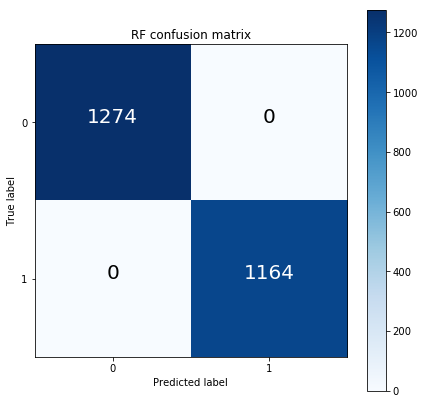

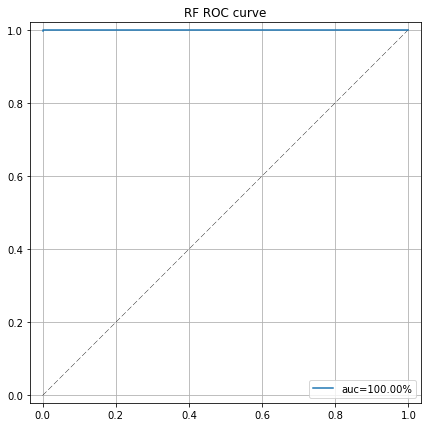

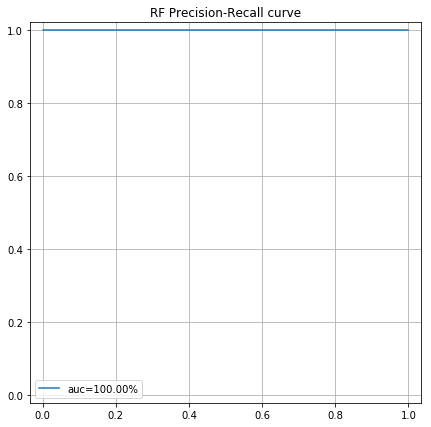

In [16]:
# Visuals for Random Forest model
clf = RC
conf, y_true, y_proba = train_test(clf, X_test, y_test)

plt.figure(figsize=(7, 7))
plot_confusion_matrix(conf)

# balanced metric
plt.figure(figsize=(7, 7))
plot_roc(y_true, y_proba)

# imbalanced metric
# y axis is recall, x is precision
plt.figure(figsize=(7, 7))
plot_prcurve(y_true, y_proba)

In [17]:
X_train.columns[RC.feature_importances_.argsort()]

Index(['cap_shape_c', 'stalk_color_above_ring_y', 'population_a',
       'stalk_color_above_ring_e', 'odor_m', 'stalk_color_above_ring_b',
       'gill_color_y', 'veil_color_o', 'veil_color_n', 'veil_type_p',
       ...
       'bruises_t', 'stalk_surface_below_ring_s', 'odor_p', 'stalk_root_e',
       'spore_print_color_k', 'bruises_f', 'population_v', 'odor_f',
       'spore_print_color_h', 'gill_size_b'],
      dtype='object', length=116)

In [18]:
from sklearn.learning_curve import learning_curve

/Users/macbook/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/macbook/anaconda/lib/python3.6/site-packages/sklearn/learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


In [19]:
# This will give you the m, training errors and testing errors.
lc = learning_curve(RandomForestClassifier(n_estimators = 10, max_features = 4), X, y)
train_cv_err = np.mean(lc[1], axis=1)
test_cv_err = np.mean(lc[2], axis=1)

In [20]:
print(lc[0])
print(train_cv_err) 
print(test_cv_err)

[ 541 1759 2978 4196 5415]
[ 1.          1.          1.          1.          0.99993844]
[ 0.51797144  0.63318562  0.79549563  0.94449165  0.9229384 ]


(0.5, 1.1)

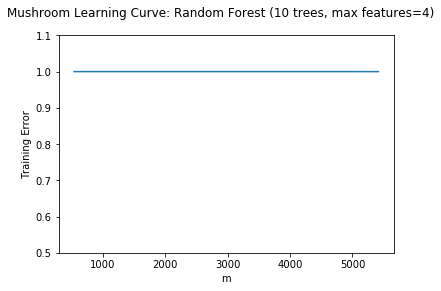

In [21]:
plt.plot([541, 1759, 2978, 4196 ,5415], [1., 1., 1.,1., 0.99993844])
plt.ylabel("Training Error")
plt.xlabel("m")
plt.suptitle('Mushroom Learning Curve: Random Forest (10 trees, max features=4)')
plt.ylim(0.5, 1.1)

(0.5, 1.1)

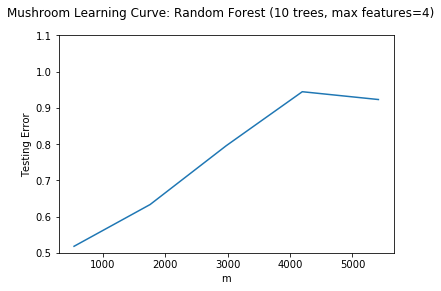

In [22]:
plt.plot([541, 1759, 2978, 4196 ,5415], [0.51797144 , 0.63318562 , 0.79549563 , 0.94449165 , 0.9229384])
plt.ylabel("Testing Error")
plt.xlabel("m")
plt.suptitle('Mushroom Learning Curve: Random Forest (10 trees, max features=4)')
plt.ylim(0.5, 1.1)